# WISCS
> Words and images in shared conceptual space

## Imports
A specalized module, `wiscs`, has been created to generate data that aligns with the various hypothesis proposed in this study.

In [1]:
import wiscs
from wiscs.simulate import DataGenerator, make_tasks
from wiscs.plotting import Plot, plot_deltas, plot_pairwise_deltas, plot_scatter
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

## Params

`wiscs` generates data based on a set of parameters specified by the user in the form of a python dictionary. A template can be accessed and modified by running the following cell.

In [2]:
# set experiment parameters
template = wiscs.set_params(return_empty=True)

Params must be a dictionary with the following keys:
 dict_keys(['word.concept', 'image.concept', 'word.task', 'image.task', 'var.image', 'var.word', 'var.question', 'var.participant', 'n.participant', 'n.question', 'n.trial'])

You can also see that data types required for each parameter

In [3]:
template

{'word.concept': typing.Union[int, float],
 'image.concept': typing.Union[int, float],
 'word.task': typing.Union[collections.abc.Buffer, numpy._typing._array_like._SupportsArray[numpy.dtype[typing.Any]], numpy._typing._nested_sequence._NestedSequence[numpy._typing._array_like._SupportsArray[numpy.dtype[typing.Any]]], bool, int, float, complex, str, bytes, numpy._typing._nested_sequence._NestedSequence[typing.Union[bool, int, float, complex, str, bytes]], typing.Callable[..., typing.Union[collections.abc.Buffer, numpy._typing._array_like._SupportsArray[numpy.dtype[typing.Any]], numpy._typing._nested_sequence._NestedSequence[numpy._typing._array_like._SupportsArray[numpy.dtype[typing.Any]]], bool, int, float, complex, str, bytes, numpy._typing._nested_sequence._NestedSequence[typing.Union[bool, int, float, complex, str, bytes]]]]],
 'image.task': typing.Union[collections.abc.Buffer, numpy._typing._array_like._SupportsArray[numpy.dtype[typing.Any]], numpy._typing._nested_sequence._Nested

Basically, you need to provide...
1. `'word.concept'` with an integer or floating point value
2. `'image.concept'` with an integer or floating point value
3. `'word.task'` with an array like or function that returns an array like (`wiscs.simulate.make_tasks()` is a custom function that can be used here)
4. `'image.task'` with an array like or function that returns an array like (`wiscs.simulate.make_tasks()` is a custom function that can be used here)
5. `'var.image'`with an integer or floating point value
6. `'var.word'` with an integer or floating point value
7. `'var.question'` with an integer or floating point value
8. `'var.participant'` with an integer or floating point value
9. `'n.participant'` with an integer
10. `'n.question'` with an integer
11. `'n.trial'` with an integer

Below is a completed set of parameters. You can set the parameters by executing `wiscs.set_params()` which will distribute the parameters to the necessary code inside `wiscs`.

In [4]:
params = {
    'word.concept': 200, # ms to get from input -> conceptual processes
    'image.concept': 175,

    'word.task': make_tasks(200, 245, 20), # ms to get from conceptual -> task processes
    'image.task': make_tasks(134, 180, 20),

    # variance parameters
    'var.image': 3,
    'var.word': 4.5,
    'var.question': 2,
    'var.participant': 1.5,

    # number of <...>
    'n.participant': 100,
    'n.question': 20,
    'n.trial': 50

}
wiscs.set_params(params)

Params set successfully


### More details about `params`

The `params` variable is composed of elements derived from our hypotheses. We expect some time for conceptual processing and task-specific processing across both hypotheses. Additionally, we expect some variance from multiple sources in the experiment, including at the participant, item and question level. We also need to specify some design choices, like number of participants, trials and questions (which can be thought of as trial blocks). `make_tasks()` generates a set of whole numbers within a specified range for the `{word, image}.task` parameter. Note that `n=...` should equal `params['n.question']`. The task parameter requires an array like of numbers. Depending on the hypothesis being simulated, `image.task` and `word.task` can be the same or different.



## Data generation
As seen in the [README.md](/README.md), we make certain hypotheses about the data. `DataGenerator` simulates data that aligns with our main and alternative hypotheses using the `fit()` method.

### `.fit()`

This method takes up to two optional keyword arguments: `params:dict=None` and `overwrite:bool=False`. If you want to update any parameter values, for example, `word.concept`, then simply provide `fit(params=)` with `{'word.concept': ...}` where `...` is the new value. The `overwrite` argument decides whether to overwrite `self.params` in _that instance only_ of the `DataGenerator` class. New instances of `DataGenerator` will have the _same_ internal parameters when running `wiscs.set_params()`. Updating the _global_ parameters requires reexecuting this procedure.

You can also provide entire new sets of parameters to `fit()` and the `DataGenerator` class will handle them as described above: it will either overwrite the original parameters (decided by the user) or simply use these new params to generate the data, without altering the global params.

In [5]:
AltDG = DataGenerator() # note we are generating data for the alternative hypothesis
image1, word1 = AltDG.fit().data

/Users/jdecker37/Library/CloudStorage/Box-Box/willdecker/GT Grad School/Projects/WISCS/github/wiscs-simulation/wiscs/simulate.py:23: UserWarning: Tasks parameters are different. Generating data for ALTERNATIVE hypothesis.
  warnings.warn("Tasks parameters are different. Generating data for ALTERNATIVE hypothesis.")


As you can see, running the above cell displays a warning: `UserWarning: Tasks parameters are different. Generating data for ALTERNATIVE hypothesis.` You can disregard this, as it will not stop the data from being generated, but it is important to note how differences in the values within the `task` parameter effect how the data are generated. 

You cam also turn this data into a Pandas dataframe. This includes columns that model a single data point as a participant's reaction time to a single trial. 

In [6]:
df = AltDG.to_pandas()
df.head()

,participant,question,trial,RT,modality
0,0,0,0,349.484661,image
1,0,0,1,354.444444,image
2,0,0,2,353.482871,image
3,0,0,3,344.006231,image
4,0,0,4,340.939647,image


Here is some data for the main hypothesis

In [7]:
MainDG = DataGenerator()

task = make_tasks(200, 245, 20)
image, word = MainDG.fit(params={'image.task': task, 'word.task':task}, overwrite=True).data

## Visualizing the data

Let's see what the data look like.

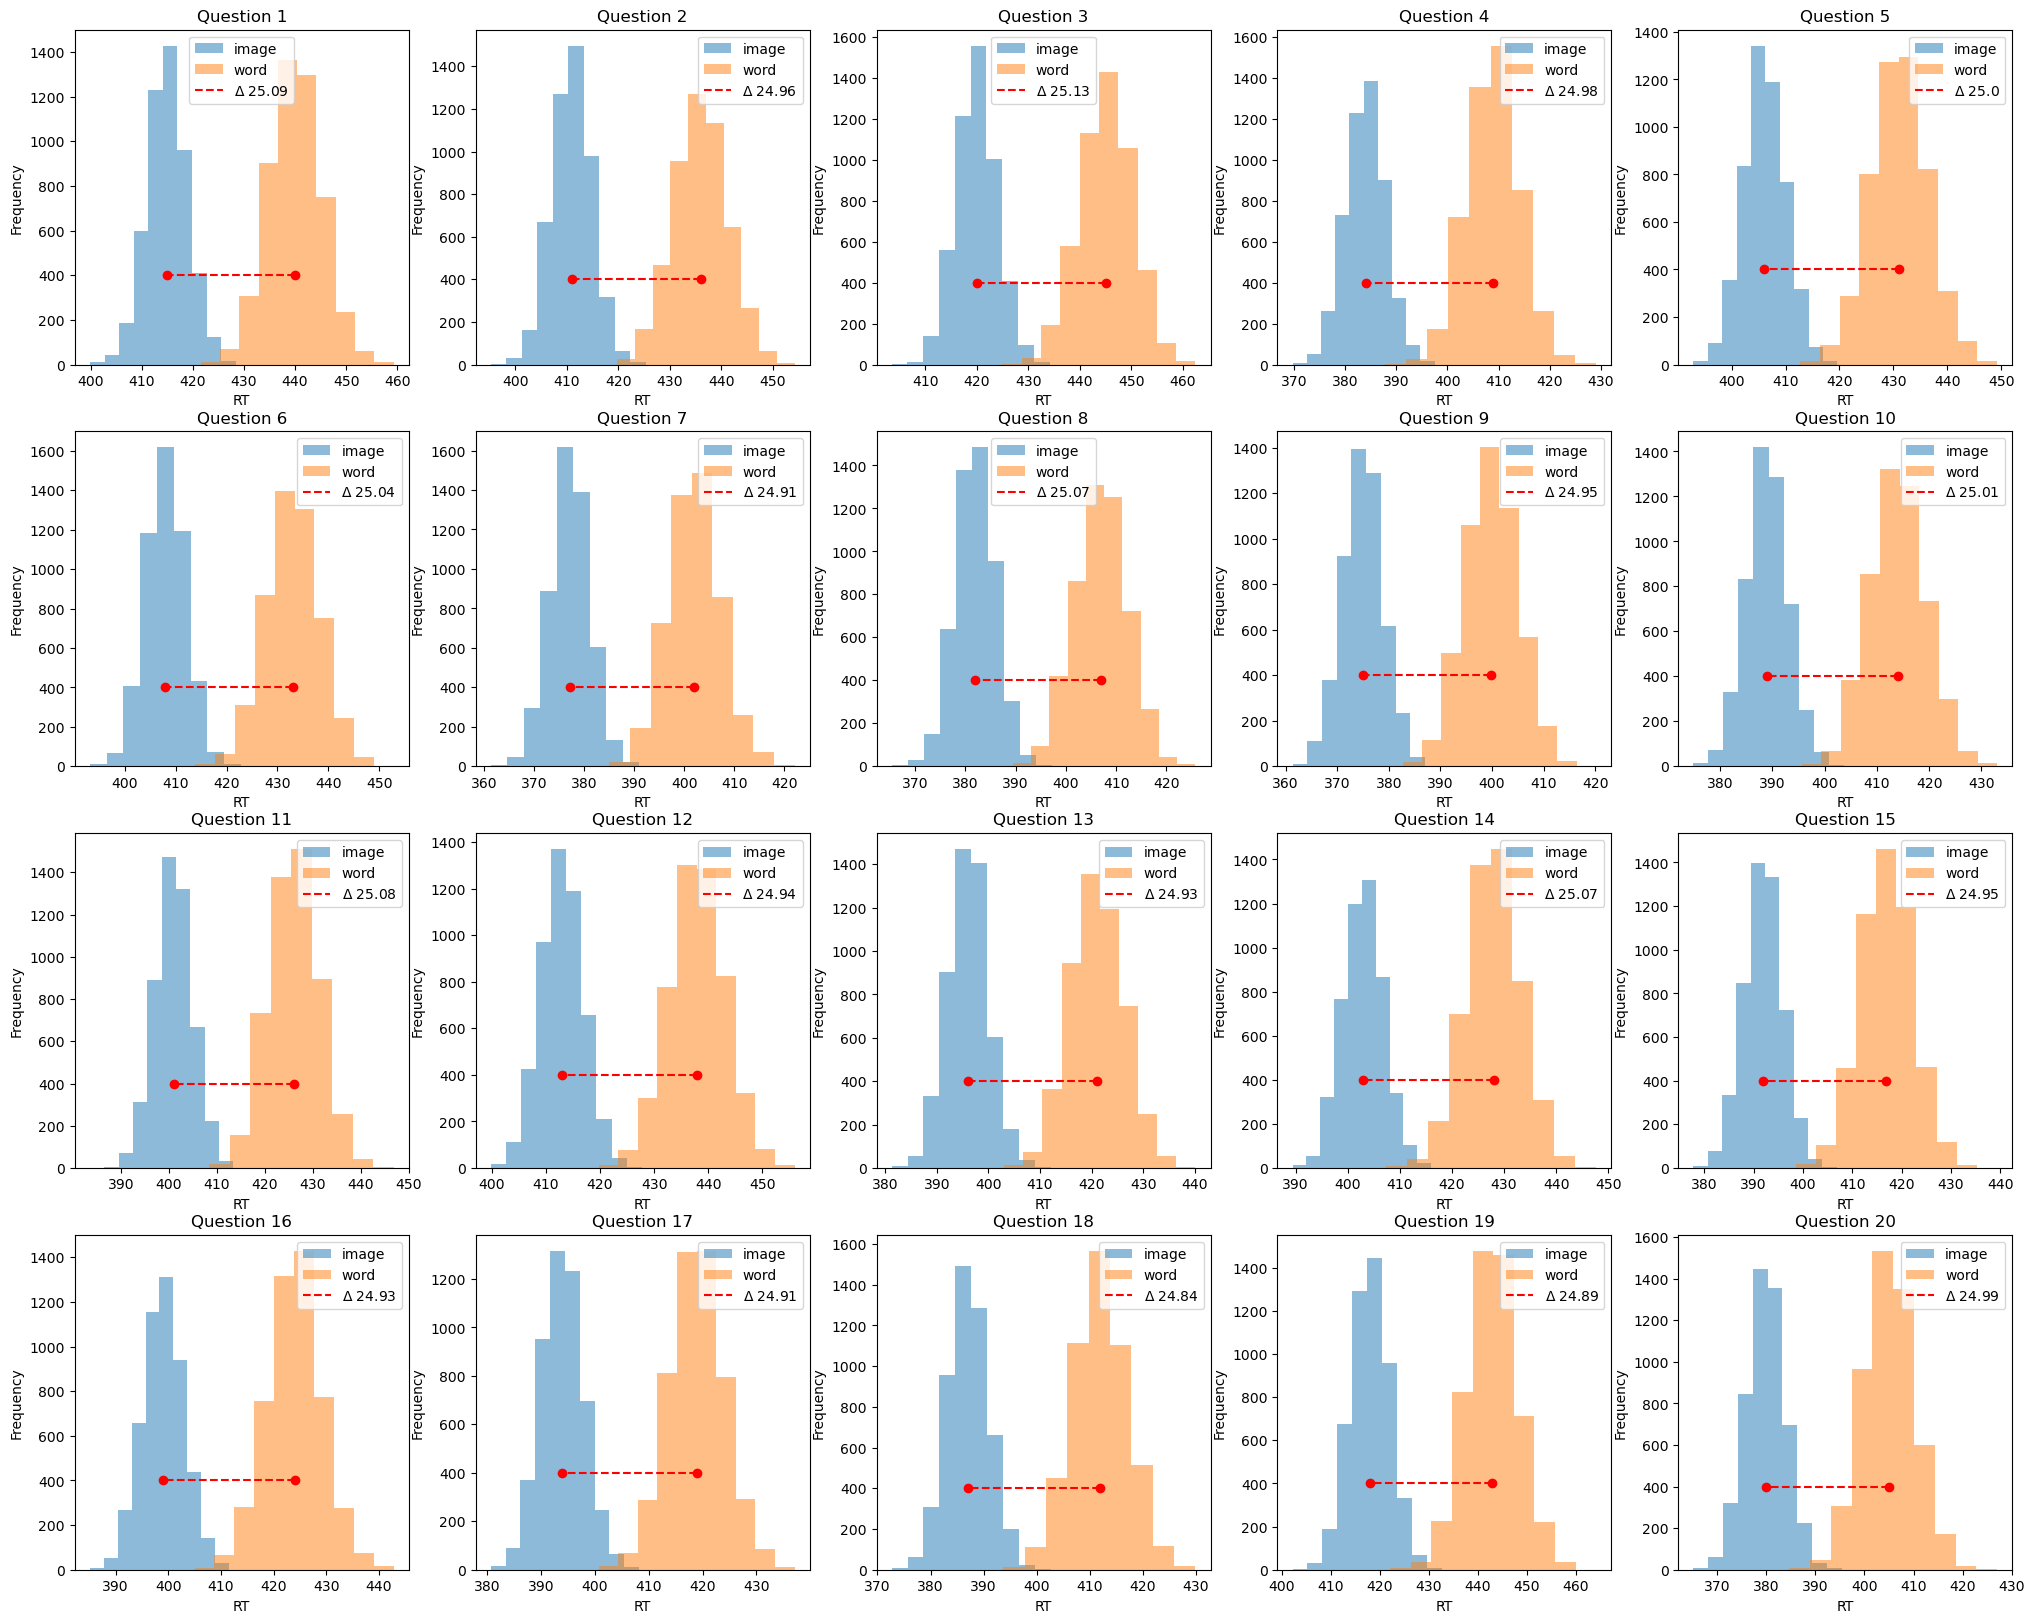

In [8]:
MainPlot = Plot(MainDG)
MainPlot.grid(idx='question')

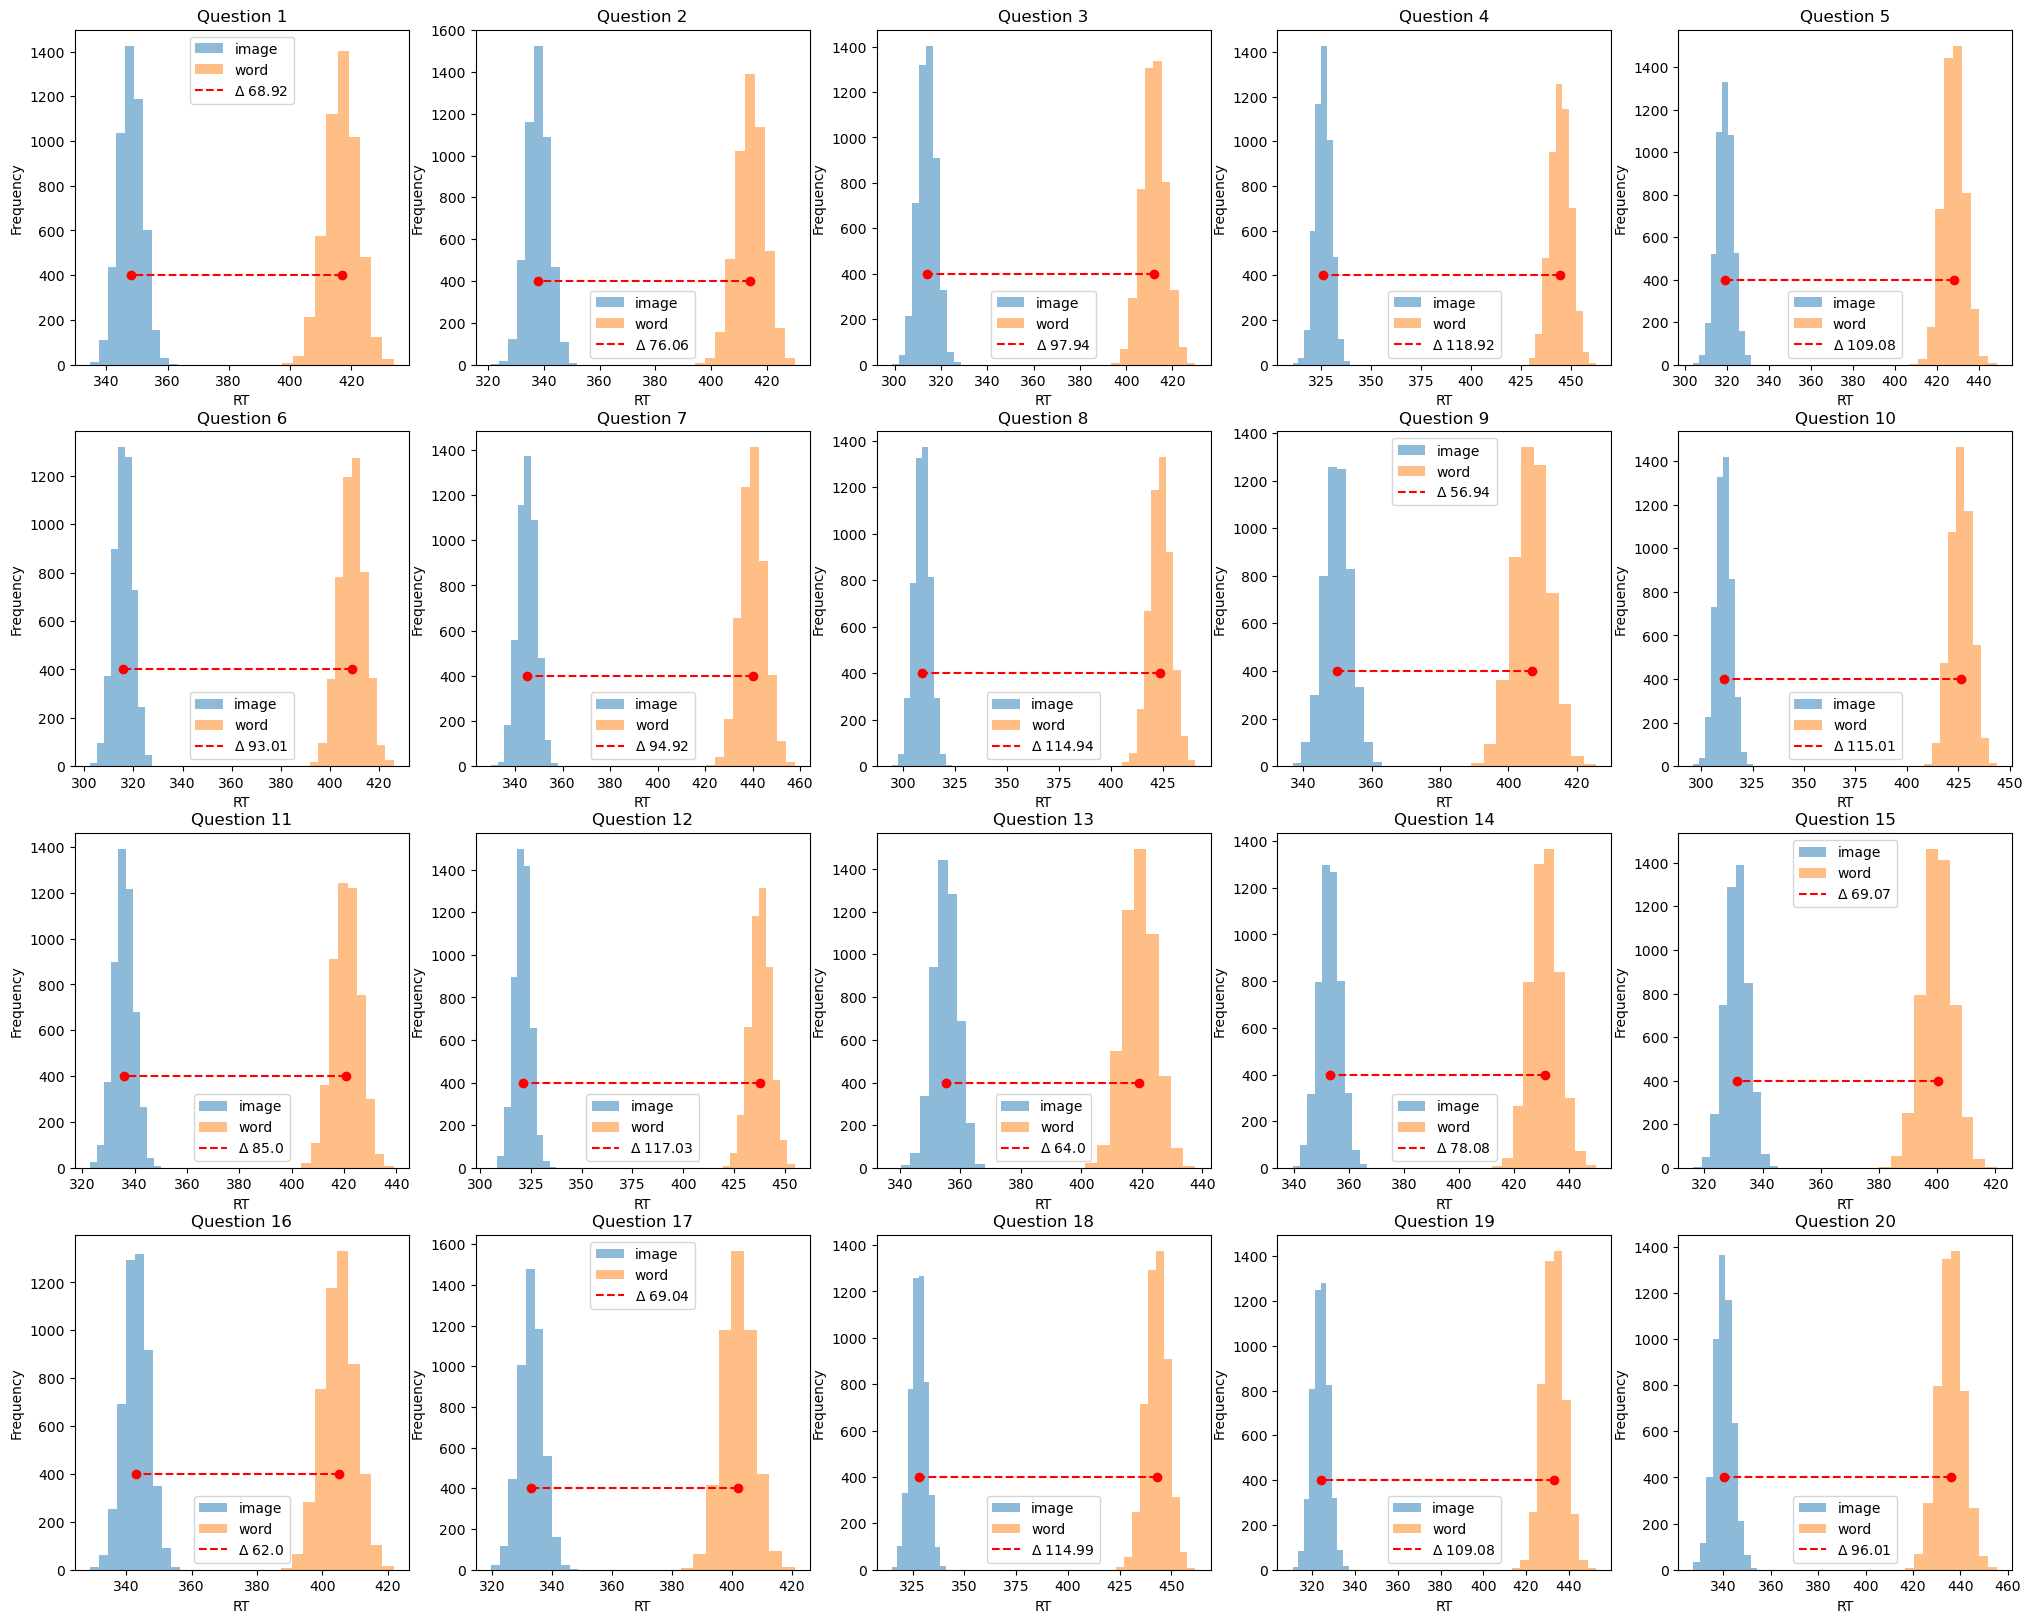

In [9]:
AltPlot = Plot(AltDG)
AltPlot.grid(idx='question')

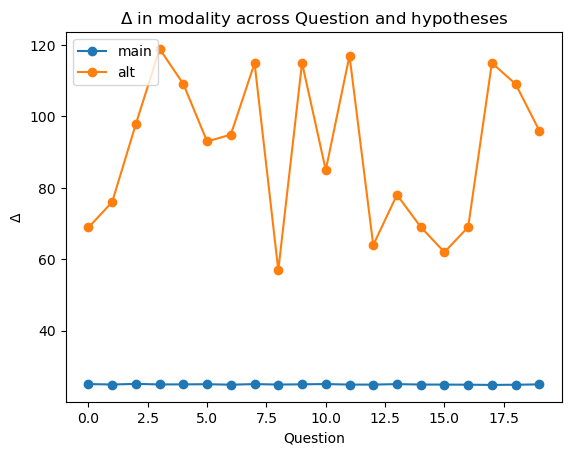

In [10]:
plot_deltas(MainDG, AltDG, idx='question', labels=['main', 'alt'])

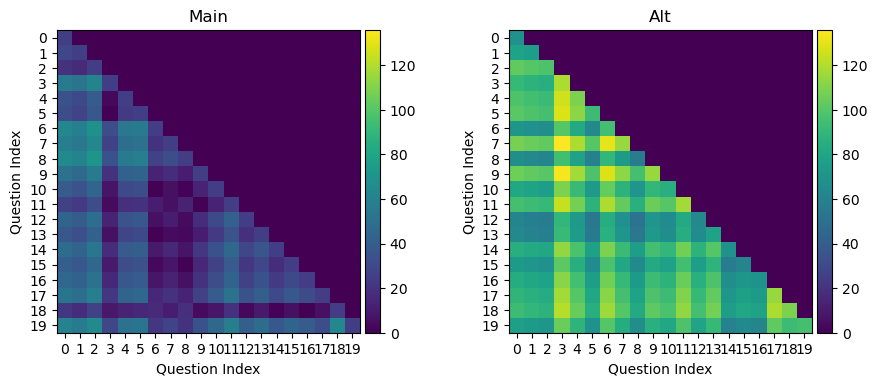

In [11]:
plot_pairwise_deltas(MainDG, AltDG, idx='question', labels=['Main', 'Alt'])

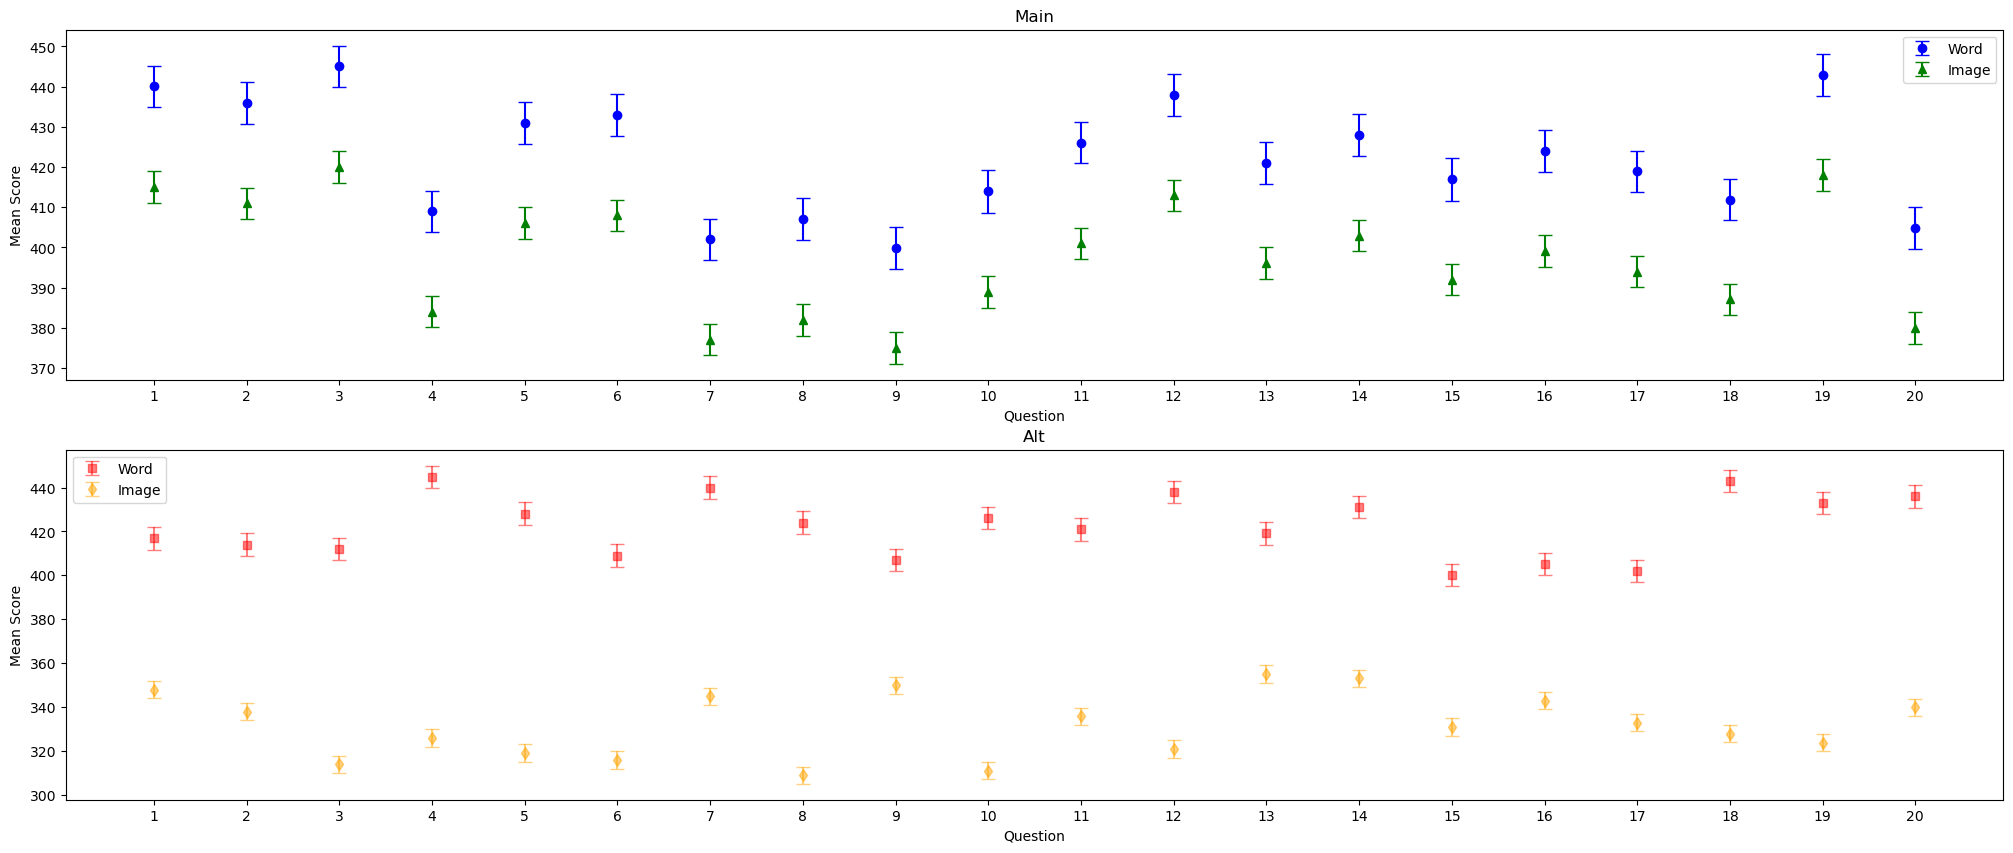

In [12]:
plot_scatter(MainDG, AltDG, idx='question', labels=['Main', 'Alt'])